In [2]:
from collections import namedtuple
servoData = namedtuple('servoData', 'motor, screw, pgain, vgain, cls')

data = [servoData(*line.split(",")) for line in open('servo.data')]

data[:10]

[servoData(motor='E', screw='E', pgain='5', vgain='4', cls=' 0.28125095\n'),
 servoData(motor='B', screw='D', pgain='6', vgain='5', cls=' 0.5062525\n'),
 servoData(motor='D', screw='D', pgain='4', vgain='3', cls=' 0.35625148\n'),
 servoData(motor='B', screw='A', pgain='3', vgain='2', cls=' 5.500033\n'),
 servoData(motor='D', screw='B', pgain='6', vgain='5', cls=' 0.35625148\n'),
 servoData(motor='E', screw='C', pgain='4', vgain='3', cls=' 0.8062546\n'),
 servoData(motor='C', screw='A', pgain='3', vgain='2', cls=' 5.100014\n'),
 servoData(motor='A', screw='A', pgain='3', vgain='2', cls=' 5.7000422\n'),
 servoData(motor='C', screw='A', pgain='6', vgain='5', cls=' 0.76875436\n'),
 servoData(motor='D', screw='A', pgain='4', vgain='1', cls=' 1.0312537\n')]

In [3]:
for i, item in enumerate(data):
    clsNew = item.cls.strip()
    clsNew = float(clsNew)
    clsNew = float("{0:.3f}".format(clsNew))
    data[i] = servoData(item.motor, item.screw.lower(), int(item.pgain), int(item.vgain), clsNew)
data[:10]

[servoData(motor='E', screw='e', pgain=5, vgain=4, cls=0.281),
 servoData(motor='B', screw='d', pgain=6, vgain=5, cls=0.506),
 servoData(motor='D', screw='d', pgain=4, vgain=3, cls=0.356),
 servoData(motor='B', screw='a', pgain=3, vgain=2, cls=5.5),
 servoData(motor='D', screw='b', pgain=6, vgain=5, cls=0.356),
 servoData(motor='E', screw='c', pgain=4, vgain=3, cls=0.806),
 servoData(motor='C', screw='a', pgain=3, vgain=2, cls=5.1),
 servoData(motor='A', screw='a', pgain=3, vgain=2, cls=5.7),
 servoData(motor='C', screw='a', pgain=6, vgain=5, cls=0.769),
 servoData(motor='D', screw='a', pgain=4, vgain=1, cls=1.031)]

# Multiplots

<h3> 
i. Produce 5 * 4 = 20 plots <br>
ii. Based on the resulting pattern, make one or more relationship more sophisticated
</h3>

 <h3> 1. Plotting types of motor with types of screws </h3>

In [4]:
ls = ['A', 'B', 'C', 'D', 'E']
from collections import defaultdict, Counter
# motor with servo
motorData = defaultdict(list)
for item in data:
    
    motorData[item.motor].append(item.screw)
motorServoCount = defaultdict(Counter)
for motorType, servoTypes in motorData.items():
    motorServoCount[motorType]= Counter(servoTypes)
    motorServoCount[motorType] = sorted(motorServoCount[motorType].items(), key=lambda pair: pair[0], reverse=True)


In [5]:
motorServoCount

defaultdict(collections.Counter,
            {'E': [('e', 6), ('d', 6), ('c', 7), ('b', 7), ('a', 7)],
             'B': [('e', 7), ('d', 7), ('c', 7), ('b', 7), ('a', 8)],
             'D': [('e', 2), ('d', 3), ('c', 3), ('b', 7), ('a', 7)],
             'C': [('e', 7), ('d', 7), ('c', 7), ('b', 7), ('a', 12)],
             'A': [('e', 7), ('d', 7), ('c', 7), ('b', 7), ('a', 8)]})

# <h3> To-do: adjust level of precision for values of attribute: class (cls). </h3>

In [23]:
import matplotlib.pyplot as plt



<Figure size 1440x1440 with 0 Axes>

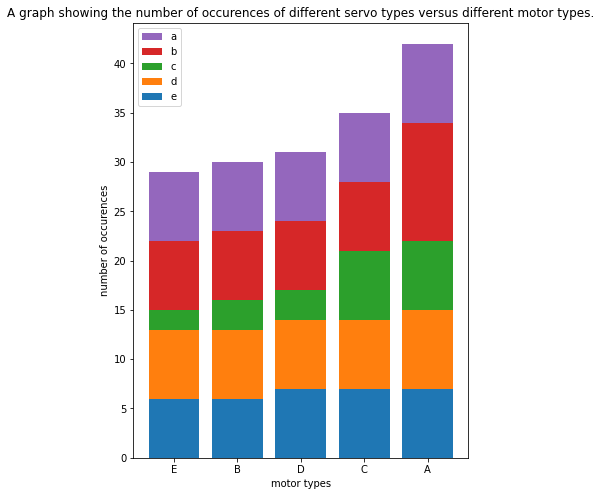

In [40]:
import numpy as np
figure = plt.figure(figsize=[6.0,8.0])
index = [ key for key, _ in motorServoCount.items() ]
# index = sorted(index)
y_offset = np.zeros(5)
plots = []
for key, counts in motorServoCount.items():
    
    plots.append(plt.bar(index, [pair[1] for pair in counts], bottom=y_offset))
    y_offset = y_offset + [pair[1] for pair in counts]
plt.legend((plots[4], plots[3], plots[2], plots[1], plots[0]), ('a', 'b', 'c', 'd', 'e'))
plt.xlabel('motor types')
plt.ylabel('number of occurences')
plt.title('A graph showing the number of occurences of different servo types versus different motor types.')
plt.show()

<h3>
As we can see motor type A has more number of type B servos. All motor types except type C have less number of 
type C servos.
</h3>